<a href="https://colab.research.google.com/github/Vincw14/test/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Data**

In [213]:
#libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [214]:
# mount the drive cloud

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
#calling the dataset link 

df = pd.read_excel (r'/content/drive/MyDrive/Code_doc/Metrics_dataset.xlsx')
df.round(decimals=1)

,LaserPower,PFR,Height-microns,Length-microns,width_penetration-microns,height_width,dilution,eval1,eval2
0,450,8.0,168.3,683.9,216.7,0.2,1.3,0,0
1,425,8.0,240.0,663.9,221.7,0.4,0.9,0,0
2,450,8.0,166.7,663.9,211.7,0.3,1.3,0,0
3,425,8.0,175.0,653.9,205.0,0.3,1.2,0,0
4,450,8.0,208.3,697.2,226.7,0.3,1.1,0,0
...,...,...,...,...,...,...,...,...,...
189,300,5.0,95.0,564.1,70.0,0.2,0.7,0,0
190,325,5.0,83.3,572.4,83.3,0.1,1.0,0,0
191,300,5.0,76.7,539.2,86.7,0.1,1.1,0,0
192,325,5.0,91.7,562.4,78.3,0.2,0.9,0,0


In [216]:
df.loc[(df['height_width'] > 0.2) & (df['height_width'] <0.33), 'eval1'] = '1'
df.loc[(df['dilution'] > 0.1), 'eval2'] = '1'
df.round(decimals=2)

,LaserPower,PFR,Height-microns,Length-microns,width_penetration-microns,height_width,dilution,eval1,eval2
0,450,8.0,168.33,683.92,216.66,0.25,1.29,1,1
1,425,8.0,240.00,663.93,221.66,0.36,0.92,0,1
2,450,8.0,166.66,663.95,211.66,0.25,1.27,1,1
3,425,8.0,174.99,653.95,204.99,0.27,1.17,1,1
4,450,8.0,208.32,697.23,226.68,0.30,1.09,1,1
...,...,...,...,...,...,...,...,...,...
189,300,5.0,95.00,564.09,70.00,0.17,0.74,0,1
190,325,5.0,83.33,572.41,83.35,0.15,1.00,0,1
191,300,5.0,76.66,539.15,86.66,0.14,1.13,0,1
192,325,5.0,91.66,562.44,78.33,0.16,0.85,0,1


In [217]:
df.describe().round(decimals=2)

,LaserPower,PFR,Height-microns,Length-microns,width_penetration-microns,height_width,dilution
count,194.00,194.00,194.00,194.00,194.00,194.00,194.00
mean,375.64,6.52,152.68,621.05,143.23,0.24,0.95
std,49.96,1.00,38.74,46.01,48.89,0.06,0.28
min,300.00,5.00,70.00,507.58,46.66,0.13,0.33
25%,325.00,5.50,128.74,592.39,101.66,0.21,0.73
50%,375.00,6.50,153.33,620.69,148.34,0.25,0.95
75%,425.00,7.50,180.00,653.95,186.67,0.28,1.16
max,450.00,8.00,261.66,730.51,226.68,0.43,1.77


# **Standard Scaler**

In [218]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
A=scaler.fit(df)

In [219]:
scaled_data= scaler.transform(df)
scaled_data

array([[ 1.49205233,  1.49437587,  0.40486264, ...,  1.1834595 ,
         0.56544486,  0.        ],
       [ 0.99039176,  1.49437587,  2.25967253, ..., -0.10471111,
        -1.76851903,  0.        ],
       [ 1.49205233,  1.49437587,  0.36172031, ...,  1.1227671 ,
         0.56544486,  0.        ],
       ...,
       [-1.51791113, -1.5255087 , -1.96739647, ...,  0.62816421,
        -1.76851903,  0.        ],
       [-1.01625055, -1.5255087 , -1.57921896, ..., -0.34948186,
        -1.76851903,  0.        ],
       [-1.51791113, -1.5255087 , -1.6223613 , ..., -0.55587114,
        -1.76851903,  0.        ]])

In [220]:
#Verifying the standarization
scaled_data.mean(axis = 0)

array([ 1.78551332e-16,  0.00000000e+00,  4.39510971e-16,  1.36431530e-15,
       -1.46503657e-16, -3.29633228e-16,  1.28190700e-16,  3.66259142e-17,
        0.00000000e+00])

# **PCA Methodology**

In [221]:
#importing PCA library

from sklearn.decomposition import PCA

In [222]:
num_components=3

pca=PCA(num_components)
pca.fit(scaled_data)
PCA(copy=True, iterated_power='auto', n_components=num_components, random_state=None, 
    svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=3)

In [223]:
pca.explained_variance_

array([3.88957814, 2.53983391, 0.81472358])

In [224]:
pca.explained_variance_ratio_

array([0.4836911 , 0.31584275, 0.1013155 ])

In [225]:
pca.components_

array([[-0.46130598, -0.11093755, -0.39854794, -0.44221115, -0.46921619,
        -0.30437712, -0.19158552, -0.26642864,  0.        ],
       [ 0.15709461, -0.45511272, -0.33629067,  0.23150393,  0.21165762,
        -0.44833373,  0.55345859, -0.22223798,  0.        ],
       [ 0.05755813, -0.41131801,  0.33781707, -0.01522694,  0.00751088,
         0.372398  , -0.14300712, -0.74428798, -0.        ]])

In [226]:
u = pca.components_.T

dfScatter = pd.DataFrame(u, columns = ['PCA1','PCA2','PCA3'])

variableAwal = df.columns
df_new = pd.concat([dfScatter, pd.DataFrame(variableAwal, columns = ['varAwal']),], axis=1)
df_new

,PCA1,PCA2,PCA3,varAwal
0,-0.461306,0.157095,0.057558,LaserPower
1,-0.110938,-0.455113,-0.411318,PFR
2,-0.398548,-0.336291,0.337817,Height-microns
3,-0.442211,0.231504,-0.015227,Length-microns
4,-0.469216,0.211658,0.007511,width_penetration-microns
5,-0.304377,-0.448334,0.372398,height_width
6,-0.191586,0.553459,-0.143007,dilution
7,-0.266429,-0.222238,-0.744288,eval1
8,0.000000,0.000000,-0.000000,eval2


In [227]:
fig = px.scatter(df_new, x='PCA1', y='PCA2', color=df_new['varAwal'])
fig.show()

In [228]:
pd.DataFrame

pandas.core.frame.DataFrame

In [229]:
fig = px.scatter(df_new, x='PCA1', y='PCA3', color=df_new['varAwal'])
fig.show()

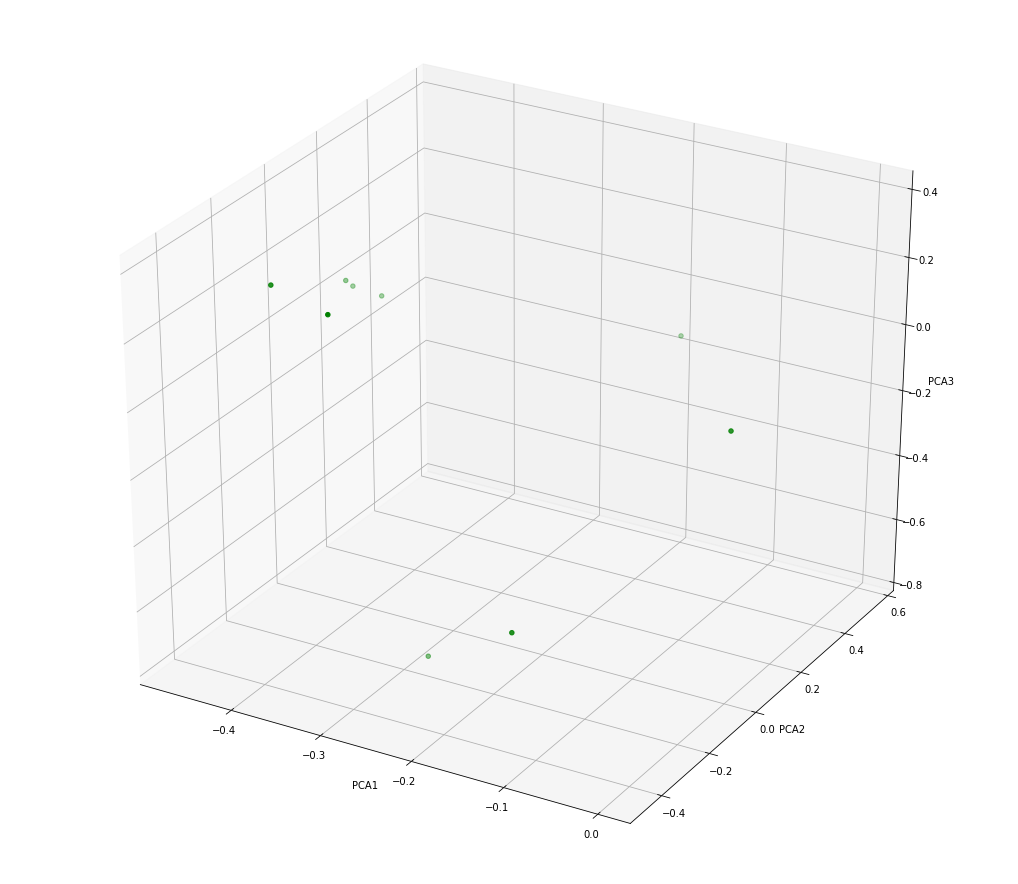

In [230]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_new.PCA1
y = df_new.PCA2
z = df_new.PCA3

ax.scatter(x, y, z, color = "green")

plt.gcf().set_size_inches(18, 16)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()

In [231]:
print("Principal axes:", pca.components_)
print("Explained variance:", pca.explained_variance_)
print("Mean:", pca.mean_)

Principal axes: [[-0.46130598 -0.11093755 -0.39854794 -0.44221115 -0.46921619 -0.30437712
  -0.19158552 -0.26642864  0.        ]
 [ 0.15709461 -0.45511272 -0.33629067  0.23150393  0.21165762 -0.44833373
   0.55345859 -0.22223798  0.        ]
 [ 0.05755813 -0.41131801  0.33781707 -0.01522694  0.00751088  0.372398
  -0.14300712 -0.74428798 -0.        ]]
Explained variance: [3.88957814 2.53983391 0.81472358]
Mean: [ 1.78551332e-16  0.00000000e+00  4.39510971e-16  1.36431530e-15
 -1.46503657e-16 -3.29633228e-16  1.28190700e-16  3.66259142e-17
  0.00000000e+00]
